In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point
from fastai import *
from sklearn import metrics
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd

In [9]:
sns.set(rc={'figure.figsize':(13,8)})

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
air =  pd.read_csv('/content/drive/MyDrive/foundation_of_DS/project/Data/NYC_air_quality_1.csv')
air.head().T

,0,1,2,3,4
SensorID,NYCP2_CS01A,NYCP2_CS01A,NYCP2_CS01A,NYCP2_CS01A,NYCP2_CS01A
time,1631277304,1631277308,1631277313,1631277318,1631277323
latitude,40.847672,40.847668,40.847649,40.847649,40.847649
longitude,-73.869316,-73.869316,-73.869362,-73.869362,-73.869362
bin0,11,22,40,26,44
bin1,1,4,1,1,4
bin2,1,1,1,0,0
bin3,0,0,0,0,1
bin4,0,0,0,0,0
bin5,0,2,1,0,0


In [12]:
air['time'] = air['time'].astype('int').astype("datetime64[s]")
air.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,2021-09-10 12:35:04,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,2021-09-10 12:35:08,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,2021-09-10 12:35:13,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,2021-09-10 12:35:18,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,2021-09-10 12:35:23,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


In [13]:
air2 = (air[['pm25', 'time', 'latitude','longitude', 'temperature', 'humidity']]).copy(deep=True)

air2.head()

,pm25,time,latitude,longitude,temperature,humidity
0,4.508813,2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3
1,5.462420,2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8
2,5.154881,2021-09-10 12:35:13,40.847649,-73.869362,23.7,57.8
3,4.508813,2021-09-10 12:35:18,40.847649,-73.869362,23.6,57.6
4,5.539503,2021-09-10 12:35:23,40.847649,-73.869362,23.6,57.5


In [14]:
#add_datepart(air2, 'time', time=True)
#air2.head()

PM2.5 values and their occurance rate

<ipython-input-15-06ca7388eaef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(air2.pm25)


<Axes: xlabel='pm25', ylabel='Density'>

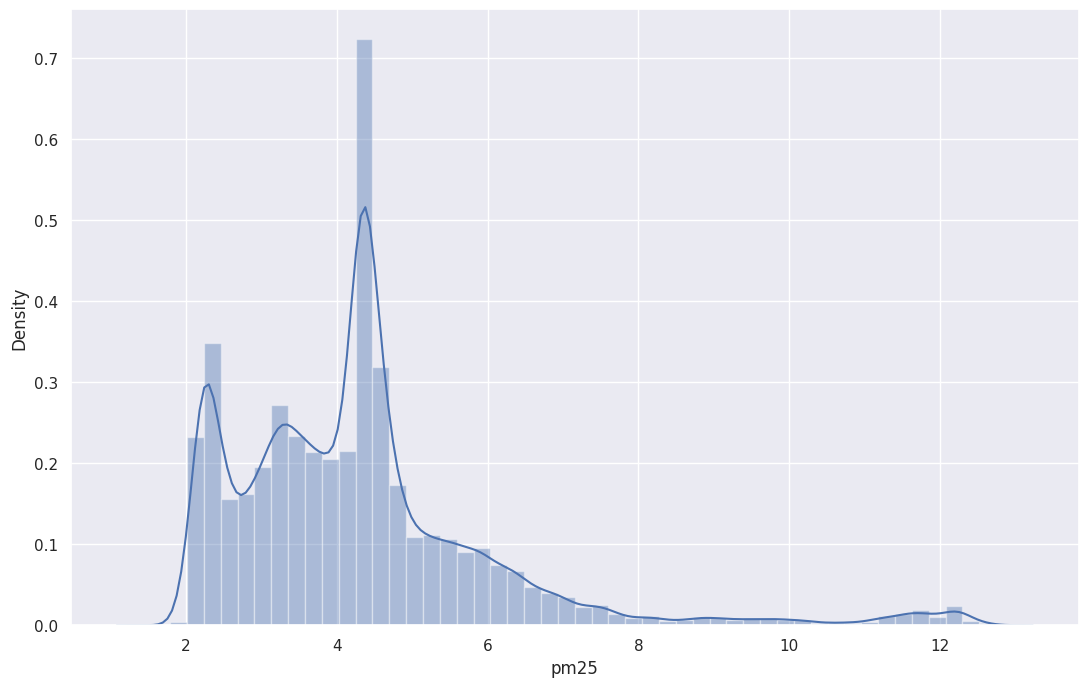

In [15]:
sns.distplot(air2.pm25)

In [16]:
hoods = gpd.read_file("/content/drive/MyDrive/foundation_of_DS/project/Data/nyc_polygon.geojson")
hoods.head()

,neighborhood,boroughCode,borough,@id,geometry
0,Allerton,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Allerton,"POLYGON ((-73.84860 40.87167, -73.84582 40.87024, -73.85456 40.85995, -73.85467 40.85959, -73.85639 40.85759, -73.86888 40.85722, -73.86832 40.85786, -73.86955 40.85778, -73.87102 40.85731, -73.87048 40.86541, -73.87055 40.86970, -73.86722 40.86969, -73.85745 40.86953, -73.85555 40.87181, -73.85360 40.87329, -73.84860 40.87167))"
1,Alley Pond Park,4,Queens,http://nyc.pediacities.com/Resource/Neighborhood/Alley_Pond_Park,"POLYGON ((-73.74333 40.73888, -73.74371 40.73940, -73.74402 40.74077, -73.74990 40.73977, -73.75145 40.74023, -73.75349 40.74239, -73.74844 40.74334, -73.74573 40.74295, -73.74476 40.74333, -73.74648 40.74685, -73.74376 40.74756, -73.74410 40.74819, -73.74566 40.75158, -73.74602 40.75266, -73.74751 40.75614, -73.75046 40.75939, -73.75242 40.76009, -73.75348 40.75881, -73.75645 40.75889, -73.75798 40.75866, -73.75978 40.75785, -73.76067 40.75699, -73.76073 40.75590, -73.76015 40.75505, -73.76067 40.75487, -73.76142 40.75574, -73.76131 40.75696, -73.76166 40.75815, -73.76093 40.75903, -73.75..."
2,Arden Heights,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arden_Heights,"POLYGON ((-74.16983 40.56108, -74.16982 40.56106, -74.16707 40.54821, -74.16692 40.54794, -74.16689 40.54785, -74.16685 40.54782, -74.16683 40.54778, -74.16623 40.54734, -74.16530 40.54427, -74.16992 40.54223, -74.17728 40.54063, -74.17733 40.54062, -74.17740 40.54248, -74.17650 40.54449, -74.18072 40.54667, -74.17959 40.54807, -74.17881 40.54966, -74.17933 40.54989, -74.18209 40.55110, -74.18318 40.55520, -74.18464 40.55381, -74.18551 40.55424, -74.18566 40.55410, -74.18609 40.55455, -74.18827 40.55328, -74.18781 40.55282, -74.18707 40.55242, -74.18858 40.55071, -74.18932 40.55113, -74.19..."
3,Arlington,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arlington,"POLYGON ((-74.15975 40.64142, -74.15998 40.64145, -74.16037 40.64158, -74.16111 40.64184, -74.16118 40.64201, -74.16135 40.64350, -74.16146 40.64429, -74.16146 40.64429, -74.15799 40.64386, -74.15743 40.64330, -74.15755 40.64325, -74.15792 40.64308, -74.15813 40.64263, -74.15828 40.64256, -74.15840 40.64254, -74.15848 40.64254, -74.15855 40.64250, -74.15858 40.64243, -74.15866 40.64231, -74.15874 40.64200, -74.15881 40.64176, -74.15920 40.64165, -74.15946 40.64145, -74.15975 40.64142))"
4,Arrochar,5,Staten Island,http://nyc.pediacities.com/Resource/Neighborhood/Arrochar,"POLYGON ((-74.06078 40.59319, -74.06079 40.59318, -74.06215 40.59203, -74.06304 40.59109, -74.06503 40.58899, -74.06448 40.58840, -74.06436 40.58827, -74.06452 40.58835, -74.06478 40.58849, -74.06720 40.58675, -74.06722 40.58673, -74.06942 40.58465, -74.07048 40.58508, -74.08024 40.59007, -74.08241 40.59321, -74.08375 40.59549, -74.08588 40.59589, -74.08559 40.59658, -74.08551 40.59678, -74.08537 40.59691, -74.08494 40.59731, -74.08481 40.59744, -74.08474 40.59746, -74.08171 40.59856, -74.07716 40.59839, -74.07490 40.59761, -74.07387 40.59764, -74.07362 40.59721, -74.06464 40.60018, -74.06..."


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(-74.28337047811634, -73.67222994890717, 40.47516404814232, 40.93650271647487)

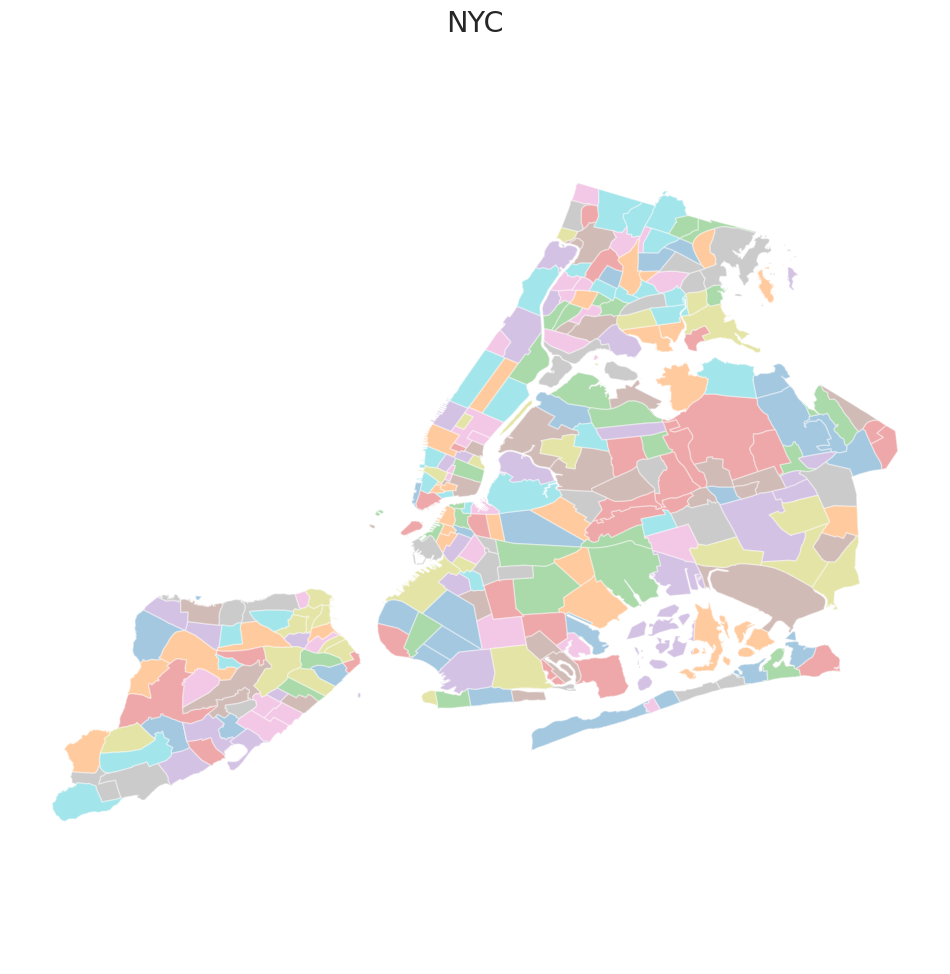

In [17]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

hoods = hoods.to_crs({'init': 'epsg:4326'})

ax = hoods.plot(column = "neighborhood", figsize = (12, 12), alpha = 0.4)

ax.axis('off')
ax.set_title("NYC", fontsize='xx-large')
ax.axis('equal')

In [18]:
!pip install folium
!pip install uszipcode
%pip install pygeohash
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.1 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=675ae6a93347b6213aa0abd580d4f0c0fb0824334f490fbf4e260bb2202df4ca
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.29
    Uninstalling SQLAlchemy-2.0.29:
      Successfully uninstalled SQLAlchemy-2.0.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.

join the geojson and csv

In [19]:
import pygeohash as gh

sampling_fraction = 0.6
geohash_precision = 6

air2['geohash']=air2.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=geohash_precision), axis=1)

import geopandas as gpd
gdf_NYCAir = gpd.GeoDataFrame(air2,   geometry=gpd.points_from_xy(air2.longitude, air2.latitude))

gdf_NYCAir = gdf_NYCAir.set_crs('epsg:4326')
gdf_NYCAir.head(2)

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry
0,4.508813,2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,dr72rh,POINT (-73.86932 40.84767)
1,5.462420,2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,dr72rh,POINT (-73.86932 40.84767)


In [20]:
sjoined_NYCAir_original = gpd.sjoin(gdf_NYCAir, hoods, predicate="within")
sjoined_NYCAir_original.head(2)

<ipython-input-20-c6a9e32a779a>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  sjoined_NYCAir_original = gpd.sjoin(gdf_NYCAir, hoods, predicate="within")


,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id
0,4.508813,2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
1,5.462420,2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [41]:
df = pd.DataFrame(sjoined_NYCAir_original)
df

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id
0,4.508813,2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
1,5.462420,2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
2,5.154881,2021-09-10 12:35:13,40.847649,-73.869362,23.7,57.8,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
3,4.508813,2021-09-10 12:35:18,40.847649,-73.869362,23.6,57.6,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
4,5.539503,2021-09-10 12:35:23,40.847649,-73.869362,23.6,57.5,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161398,3.421613,2021-10-29 18:17:24,40.829147,-73.931694,15.6,63.7,dr72m8,POINT (-73.93169 40.82915),131,Highbridge,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Highbridge
161454,2.292276,2021-11-11 22:54:17,40.858864,-73.922646,16.3,65.7,dr72my,POINT (-73.92265 40.85886),141,Inwood,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Inwood
161455,2.367734,2021-11-11 22:54:37,40.854622,-73.923546,16.0,67.1,dr72mv,POINT (-73.92355 40.85462),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Washington_Heights
161459,3.464629,2021-11-14 01:29:46,40.839794,-73.848595,7.9,56.0,dr72rd,POINT (-73.84860 40.83979),299,Westchester Square,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Westchester_Square


In [42]:
import datetime as dt

df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year
0,4.508813,2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
1,5.462420,2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
2,5.154881,2021-09-10 12:35:13,40.847649,-73.869362,23.7,57.8,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
3,4.508813,2021-09-10 12:35:18,40.847649,-73.869362,23.6,57.6,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
4,5.539503,2021-09-10 12:35:23,40.847649,-73.869362,23.6,57.5,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161398,3.421613,2021-10-29 18:17:24,40.829147,-73.931694,15.6,63.7,dr72m8,POINT (-73.93169 40.82915),131,Highbridge,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Highbridge,29,18,10,2021
161454,2.292276,2021-11-11 22:54:17,40.858864,-73.922646,16.3,65.7,dr72my,POINT (-73.92265 40.85886),141,Inwood,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Inwood,11,22,11,2021
161455,2.367734,2021-11-11 22:54:37,40.854622,-73.923546,16.0,67.1,dr72mv,POINT (-73.92355 40.85462),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Washington_Heights,11,22,11,2021
161459,3.464629,2021-11-14 01:29:46,40.839794,-73.848595,7.9,56.0,dr72rd,POINT (-73.84860 40.83979),299,Westchester Square,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Westchester_Square,14,1,11,2021


In [38]:
%%time
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [808 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,691 kB]
Get:13 http://archive.ubuntu.com/ubuntu

In [45]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point

convert to geodataframe

In [50]:
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=df["geometry"])
gdf

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year
0,4.508813,2021-09-10 12:35:04,40.847672,-73.869316,23.7,57.3,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
1,5.462420,2021-09-10 12:35:08,40.847668,-73.869316,23.7,57.8,dr72rh,POINT (-73.86932 40.84767),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
2,5.154881,2021-09-10 12:35:13,40.847649,-73.869362,23.7,57.8,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
3,4.508813,2021-09-10 12:35:18,40.847649,-73.869362,23.6,57.6,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
4,5.539503,2021-09-10 12:35:23,40.847649,-73.869362,23.6,57.5,dr72rh,POINT (-73.86936 40.84765),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,10,12,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161398,3.421613,2021-10-29 18:17:24,40.829147,-73.931694,15.6,63.7,dr72m8,POINT (-73.93169 40.82915),131,Highbridge,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Highbridge,29,18,10,2021
161454,2.292276,2021-11-11 22:54:17,40.858864,-73.922646,16.3,65.7,dr72my,POINT (-73.92265 40.85886),141,Inwood,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Inwood,11,22,11,2021
161455,2.367734,2021-11-11 22:54:37,40.854622,-73.923546,16.0,67.1,dr72mv,POINT (-73.92355 40.85462),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Washington_Heights,11,22,11,2021
161459,3.464629,2021-11-14 01:29:46,40.839794,-73.848595,7.9,56.0,dr72rd,POINT (-73.84860 40.83979),299,Westchester Square,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Westchester_Square,14,1,11,2021


visualizing how different projections transform data

1)

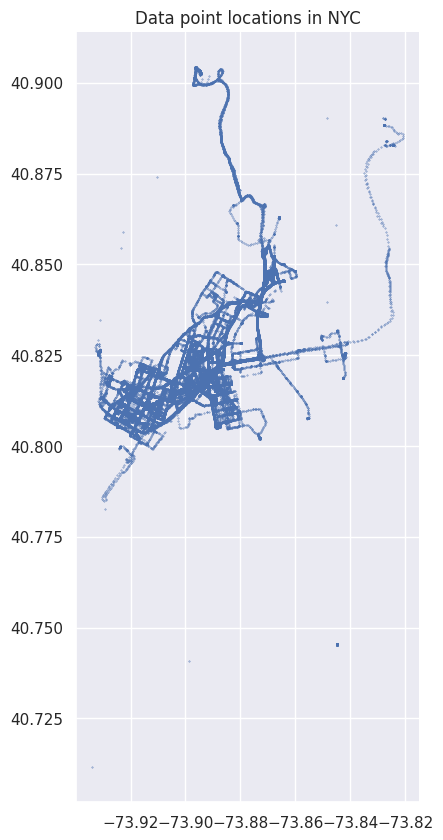

In [53]:
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(markersize=0.1,ax=ax);
ax.set_title('Data point locations in NYC')
plt.show()

2)

In [72]:
nyc_gdf_proj = gdf.to_crs({'init': 'epsg:32618'})
nyc_gdf_proj.tail()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year
161398,3.421613,2021-10-29 18:17:24,40.829147,-73.931694,15.6,63.7,dr72m8,POINT (590078.543 4520340.126),131,Highbridge,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Highbridge,29,18,10,2021
161454,2.292276,2021-11-11 22:54:17,40.858864,-73.922646,16.3,65.7,dr72my,POINT (590800.902 4523648.332),141,Inwood,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Inwood,11,22,11,2021
161455,2.367734,2021-11-11 22:54:37,40.854622,-73.923546,16.0,67.1,dr72mv,POINT (590730.836 4523176.496),295,Washington Heights,1,Manhattan,http://nyc.pediacities.com/Resource/Neighborhood/Washington_Heights,11,22,11,2021
161459,3.464629,2021-11-14 01:29:46,40.839794,-73.848595,7.9,56.0,dr72rd,POINT (597069.972 4521610.797),299,Westchester Square,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Westchester_Square,14,1,11,2021
161461,3.309879,2021-11-14 02:23:19,40.890411,-73.848419,6.9,60.5,dr72xe,POINT (597010.909 4527229.993),294,Wakefield,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Wakefield,14,2,11,2021


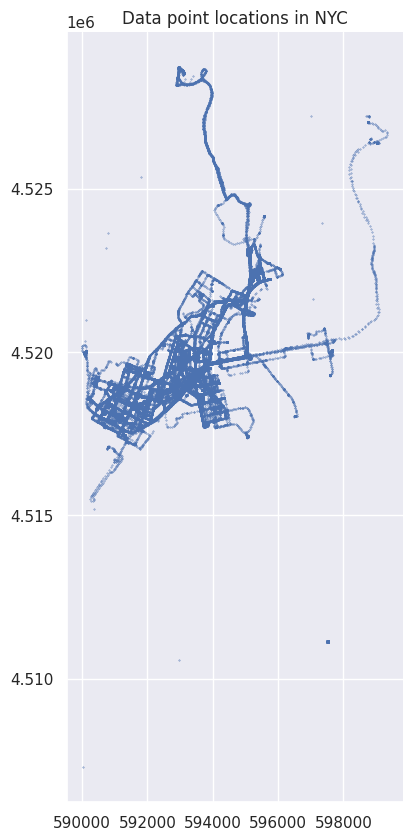

In [62]:
fig, ax = plt.subplots(figsize=(12,10))
nyc_gdf_proj.plot(markersize=0.1,ax=ax);
ax.set_title('Data point locations in NYC')
plt.show()

choose data subset

In [79]:
neighborhoodcp = nyc_gdf_proj[nyc_gdf_proj['neighborhood']== 'Clason Point']
neighborhoodcp

,pm25,time,latitude,longitude,temperature,humidity,geohash,geometry,index_right,neighborhood,boroughCode,borough,@id,day,hour,month,year
159204,4.502192,2021-10-02 17:46:54,40.820648,-73.865379,25.7,40.8,dr72pp,POINT (595682.481 4519466.948),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,17,10,2021
159205,3.790493,2021-10-02 17:46:59,40.820232,-73.864967,25.7,41.0,dr72pp,POINT (595717.823 4519421.218),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,17,10,2021
159206,3.790493,2021-10-02 17:47:04,40.819874,-73.864578,25.7,40.9,dr72pp,POINT (595751.143 4519381.902),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,17,10,2021
159207,3.790493,2021-10-02 17:47:09,40.819485,-73.864166,25.6,40.8,dr72pn,POINT (595786.448 4519339.169),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,17,10,2021
159208,3.790493,2021-10-02 17:47:14,40.819088,-73.863792,25.6,40.9,dr72pn,POINT (595818.560 4519295.508),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,17,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159365,4.289837,2021-10-02 18:01:49,40.819450,-73.864021,26.0,40.7,dr72pn,POINT (595798.727 4519335.443),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,18,10,2021
159366,4.289837,2021-10-02 18:01:54,40.819839,-73.864433,26.0,40.9,dr72pp,POINT (595763.422 4519378.175),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,18,10,2021
159367,4.289837,2021-10-02 18:01:59,40.820229,-73.864853,26.0,41.4,dr72pp,POINT (595727.441 4519421.010),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,18,10,2021
159368,4.289837,2021-10-02 18:02:04,40.820568,-73.865204,25.9,40.7,dr72pp,POINT (595697.354 4519458.258),58,Clason Point,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Clason_Point,2,18,10,2021


create buffer

In [95]:
point1 = neighborhoodcp[:1]
buf10 = point1.buffer(10)
buf50 = point1.buffer(50)
buf100 = point1.buffer(100)

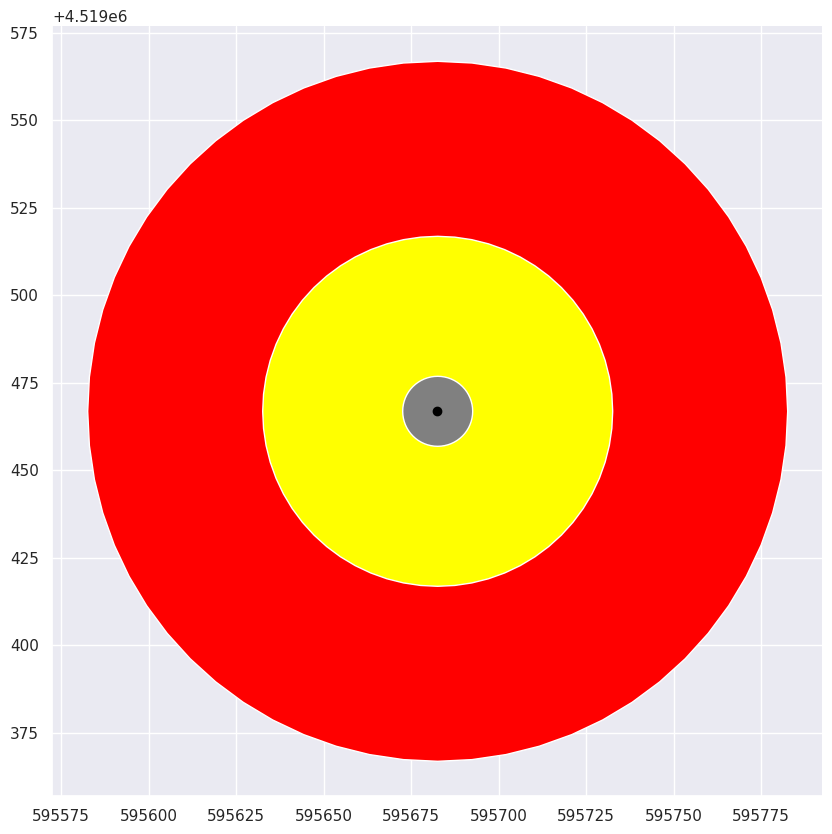

In [96]:
fig, ax = plt.subplots(figsize=(12, 10))
buf100.plot(color = 'red', ax=ax);
buf50.plot(ax=ax, color='yellow')
buf10.plot(ax=ax, color='gray');
point1.plot(ax=ax, color='black')
plt.show()

visualize subset

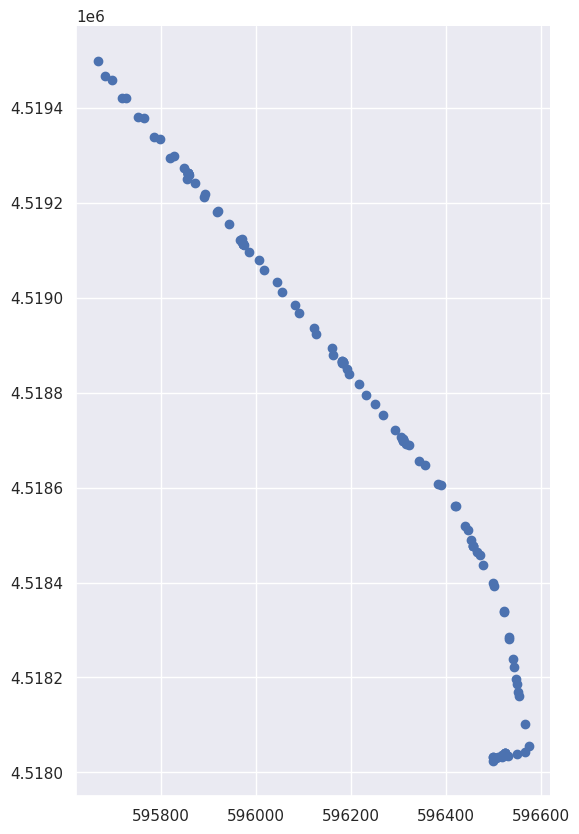

In [97]:
fig, ax = plt.subplots(figsize=(12, 10))
neighborhoodcp.plot(ax=ax)
plt.show()

visualize buffered subset

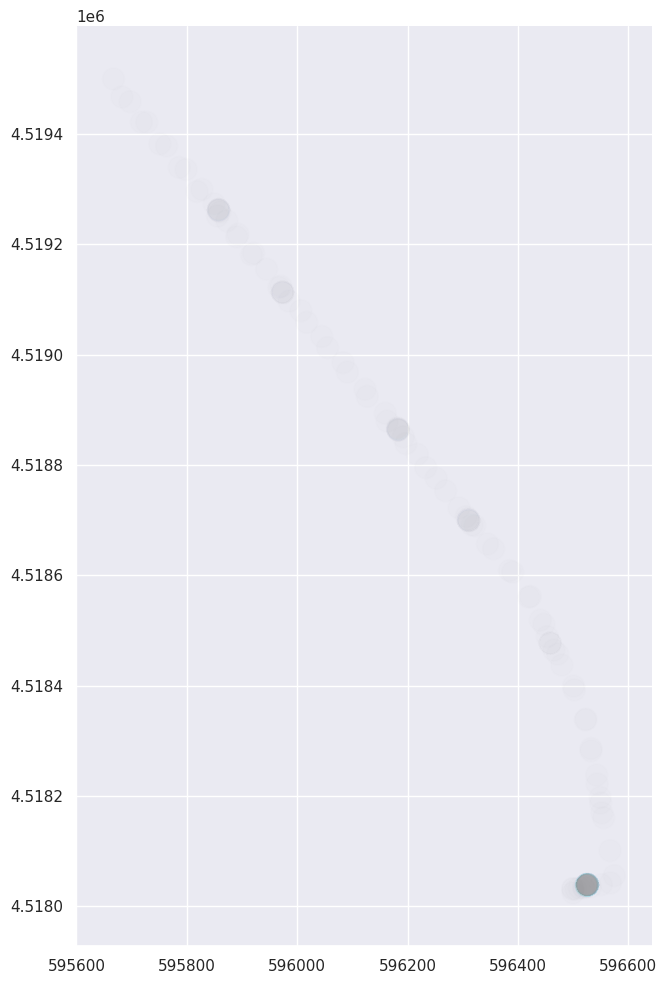

In [98]:
fig, ax = plt.subplots(figsize=(12, 10))
neighborhoodcp.buffer(20).plot(ax=ax, facecolor='grey',edgecolor='lightblue', alpha=0.01)
plt.tight_layout()
plt.show()

remove non numerical columns

In [24]:
df = df.drop(columns=['time', 'geohash', 'geometry', 'borough', 'neighborhood', '@id','latitude', 'longitude'])
df

,pm25,temperature,humidity,index_right,boroughCode,day,hour,month,year
0,4.508813,23.7,57.3,38,2,10,12,9,2021
1,5.462420,23.7,57.8,38,2,10,12,9,2021
2,5.154881,23.7,57.8,38,2,10,12,9,2021
3,4.508813,23.6,57.6,38,2,10,12,9,2021
4,5.539503,23.6,57.5,38,2,10,12,9,2021
...,...,...,...,...,...,...,...,...,...
161398,3.421613,15.6,63.7,131,2,29,18,10,2021
161454,2.292276,16.3,65.7,141,1,11,22,11,2021
161455,2.367734,16.0,67.1,295,1,11,22,11,2021
161459,3.464629,7.9,56.0,299,2,14,1,11,2021


create train/test split and scale the predictors with the StandardScaler class:

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('pm25', axis=1)
y = df['pm25']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

Using Principal Component Analysis (PCA) to determine feature importance
1) fit PCA to our scaled data
2) plot a line plot of the cumulative explained variance:

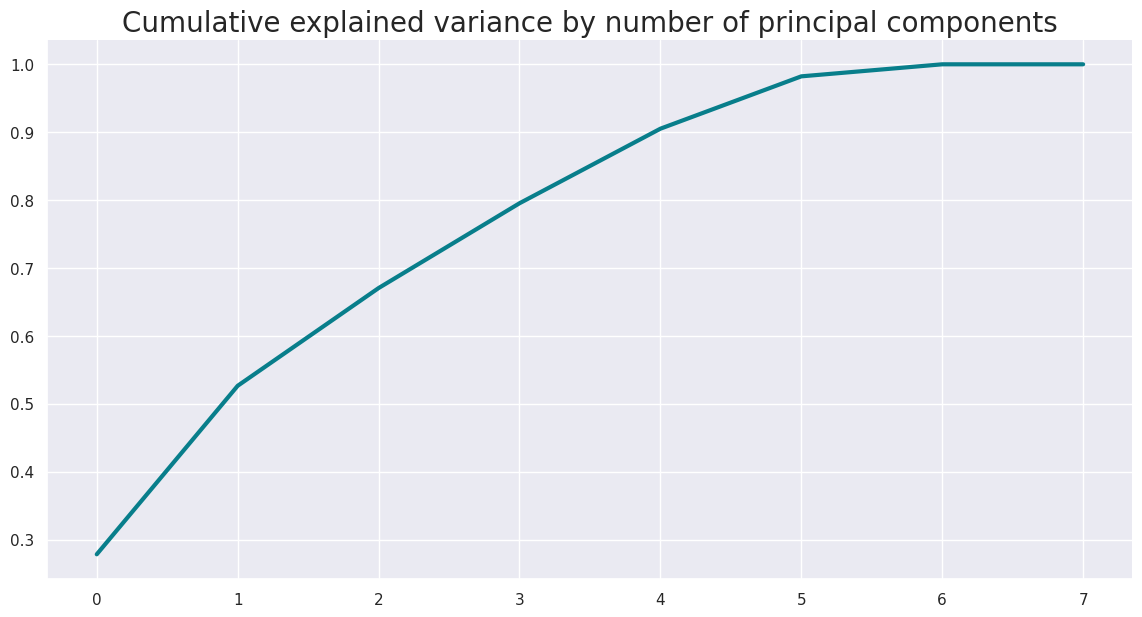

In [26]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

We learn that using 4 principal components, 90% of the dataset's variance could be explained.

computing loading scores:

In [27]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
temperature,-0.856689,-0.056285,0.045824,-0.455605,0.077808,-0.030900,-0.215031,0.0
humidity,0.329384,-0.682277,-0.073049,0.066859,0.469066,-0.440000,-0.050817,0.0
index_right,-0.285081,0.572859,-0.171966,0.282575,0.663726,0.201492,0.004129,0.0
boroughCode,-0.061474,-0.053328,0.976760,0.141252,0.134151,0.036550,0.006358,0.0
day,-0.496302,-0.362849,-0.101739,0.734797,-0.245136,0.019863,-0.106155,0.0


PC1 explains +50% of the variance in the data. With the others explaining less and less. This makes PC1 very the most important. There is an 85% negative correlation between PC1 and temperature.

Correlations between all of the input features and the first principal components:

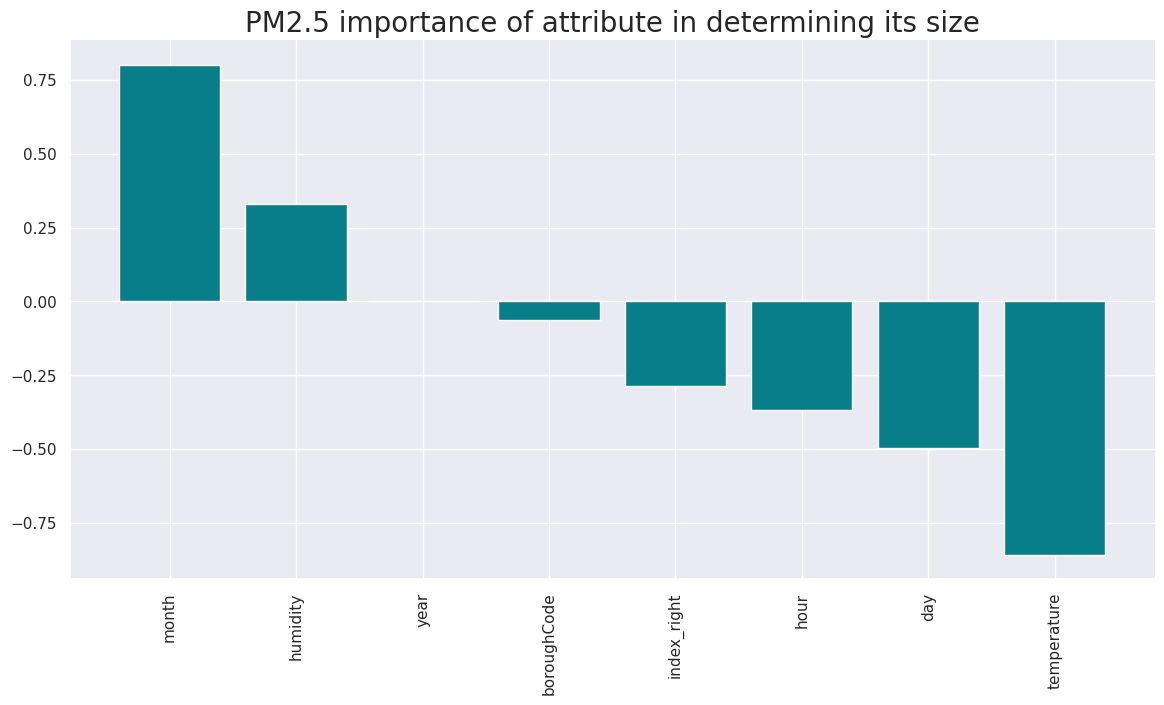

In [28]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PM2.5 importance of attribute in determining its size', size=20)
plt.xticks(rotation='vertical')
plt.show()